In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from datetime import timedelta, datetime 
import tweepy
from scipy.stats import ttest_ind
from sklearn.preprocessing import MinMaxScaler

In [3]:
def format_date(date):
    new_date = date[:-10]
    return(new_date)

In [4]:
trendings_keywords = pd.read_csv('../Data/trendings.csv')
df = pd.read_parquet('../Data/Full_dataset/data_filtered.gzip')
df = df.merge(trendings_keywords[['trending','Sector']].drop_duplicates(), how='left', left_on='Trending', right_on='trending')
df['tweet_date'] = df['date'].apply(format_date)

In [40]:
sample_df = df.groupby('Trending', group_keys=False).sample(frac=0.007, random_state = 1)
sample_df['text'] = sample_df['text'].str.replace('\n', ' ')

In [41]:
df_trendings_counts_sample = sample_df[['Trending', 'Sector', 'text']].groupby(['Trending', 'Sector']).count().reset_index()
df_trendings_counts_sample = df_trendings_counts_sample.sort_values(by=['text'], ascending = False)

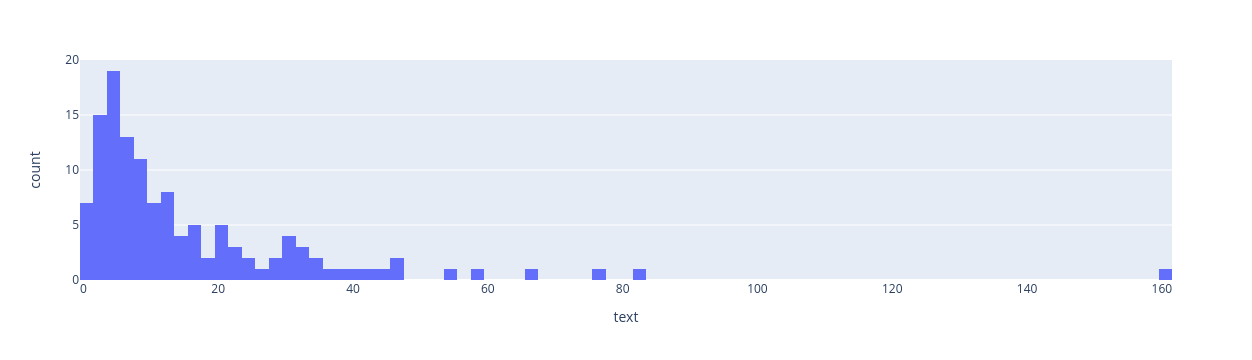

In [42]:
fig = px.histogram(df_trendings_counts_sample, x='text', nbins=100)
fig.show()

In [58]:
df_trendings_counts = df[['Trending', 'Sector', 'text']].groupby(['Trending', 'Sector']).count().reset_index().rename(
    columns={'text': 'Cantidad de Tweets'}).sort_values(by=['Cantidad de Tweets'], ascending = False)

In [59]:
fig = px.histogram(df_trendings_counts, x='Number of Tweets', nbins=100).update_layout(
    title={"text": "Cantidad de Hastags por cantidad de tweets", "x": 0.5}, yaxis_title="Cantidad de  Hastags")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Trending', 'Sector', 'Cantidad de Tweets'] but received: Number of Tweets

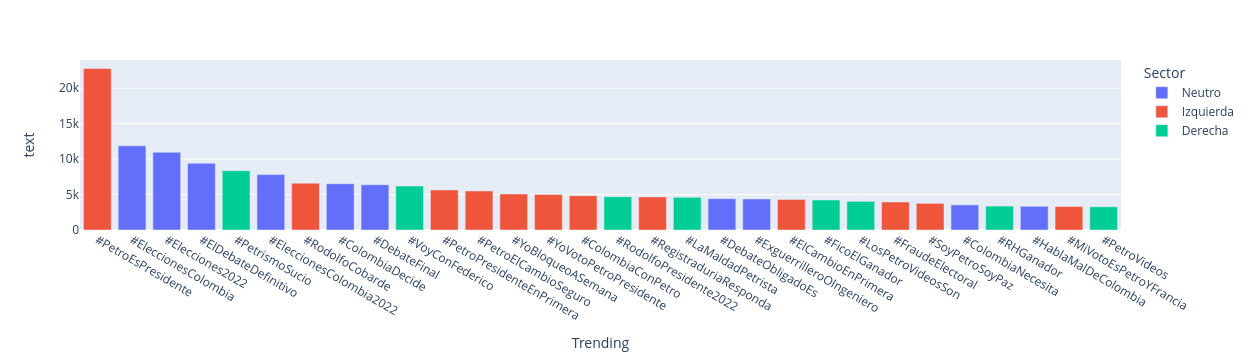

In [27]:
fig = px.bar(df_trendings_counts.iloc[0:30], x='Trending', y='text', color = 'Sector', category_orders = {'Trending': list(df_trendings_counts['Trending']), 'Sector': ['Neutro', 'Izquierda', 'Derecha']})
fig.show()

In [28]:
df_hashtags_count = pd.DataFrame(trendings_keywords['Sector'].value_counts()).reset_index().rename(
    columns={'Sector' : 'Number of hashtags', "index": "Sector", })

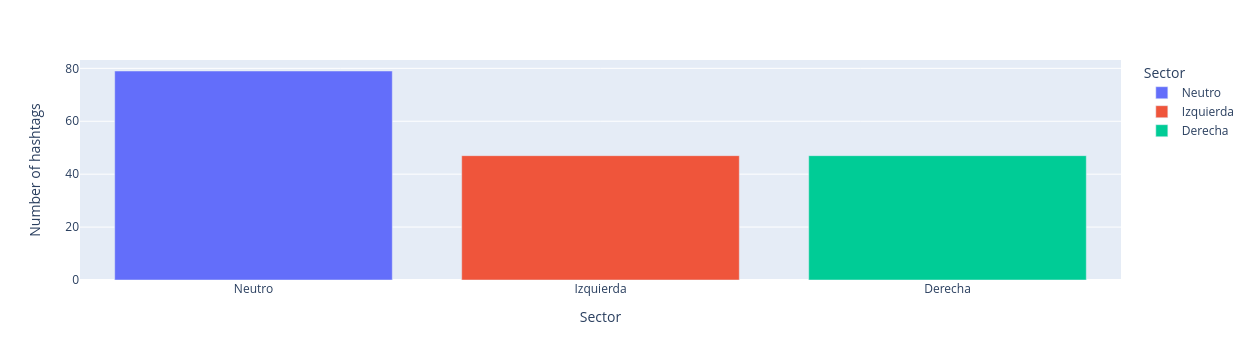

In [29]:
fig = px.bar(df_hashtags_count, x='Sector', y='Number of hashtags', color = 'Sector', category_orders = {'Sector': ['Neutro', 'Izquierda', 'Derecha']})
fig.show()

In [30]:
df_tweets_count = pd.DataFrame(df['Sector'].value_counts()).reset_index().rename(
    columns={'Sector' : 'Number of Tweets', "index": "Sector", })

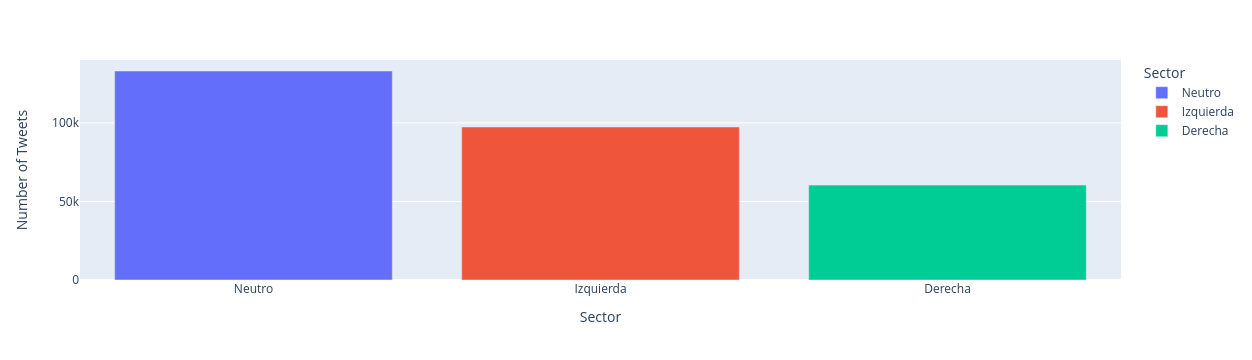

In [31]:
fig = px.bar(df_tweets_count, x='Sector', y='Number of Tweets', color = 'Sector', category_orders = {'Sector': ['Neutro', 'Izquierda', 'Derecha']})
fig.show()

In [32]:
df_dates = df[['tweet_date', 'Sector', 'text']].groupby(['tweet_date', 'Sector']).count().reset_index()
df_dates_pivot = df_dates.pivot(index = 'tweet_date', columns=["Sector"],values="text").reset_index()
df_dates_pivot = df_dates_pivot.fillna(0)
df_dates_pivot['Total'] = df_dates_pivot[['Derecha', 'Izquierda', 'Neutro']].sum(axis=1)

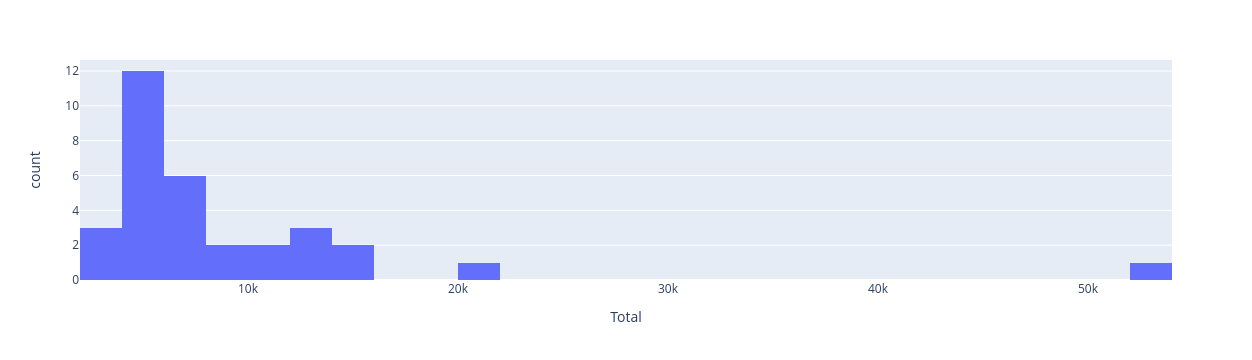

In [34]:
fig = px.histogram(df_dates_pivot, x='Total', nbins=40)
fig.show()

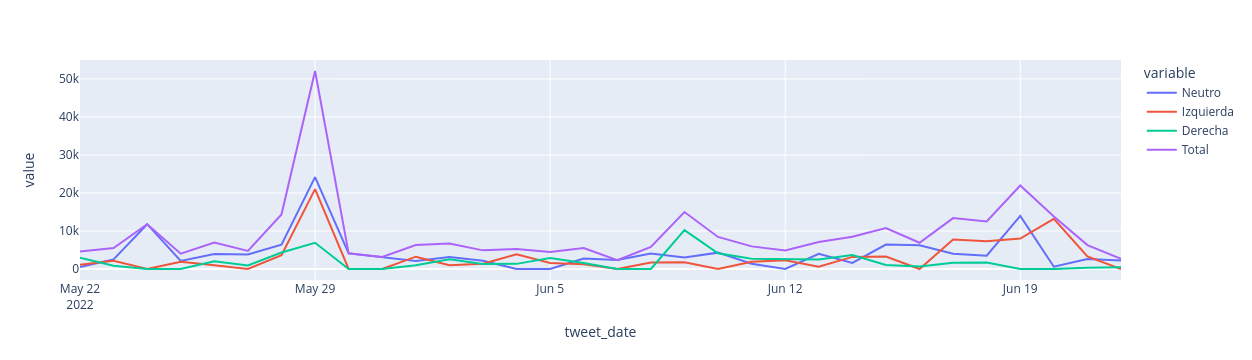

In [35]:
px.line(df_dates_pivot, x='tweet_date', y=df_dates_pivot.columns[1:], category_orders = {'variable': ['Neutro', 'Izquierda', 'Derecha']})

In [36]:
df_author_counts = df[['author_id', 'Sector', 'text']].groupby(['author_id', 'Sector']).count().reset_index()
df_total_counts_author = df[['author_id', 'text']].groupby(['author_id']).count().reset_index()
df_author_counts= pd.merge(df_author_counts , df_total_counts_author, on=['author_id'] )
df_author_counts = df_author_counts.rename(columns={"text_x": "Tweets Sector", "text_y": "Total Tweets"})
df_author_counts = df_author_counts.sort_values(by=['Total Tweets'], ascending = False)
df_author_counts_filt = df_author_counts[df_author_counts['Total Tweets'] > 159]
df_author_counts_filt['author_id'] = df_author_counts_filt['author_id'].astype(str)

/tmp/ipykernel_7228/1804017962.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



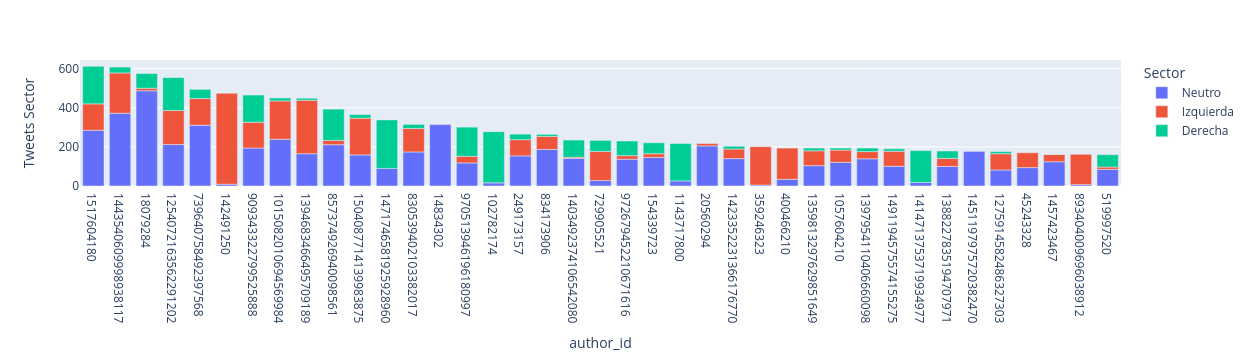

In [37]:
fig = px.bar(df_author_counts_filt, x='author_id', y="Tweets Sector", color="Sector", category_orders = {'Sector': ['Neutro', 'Izquierda', 'Derecha']})
fig.show()

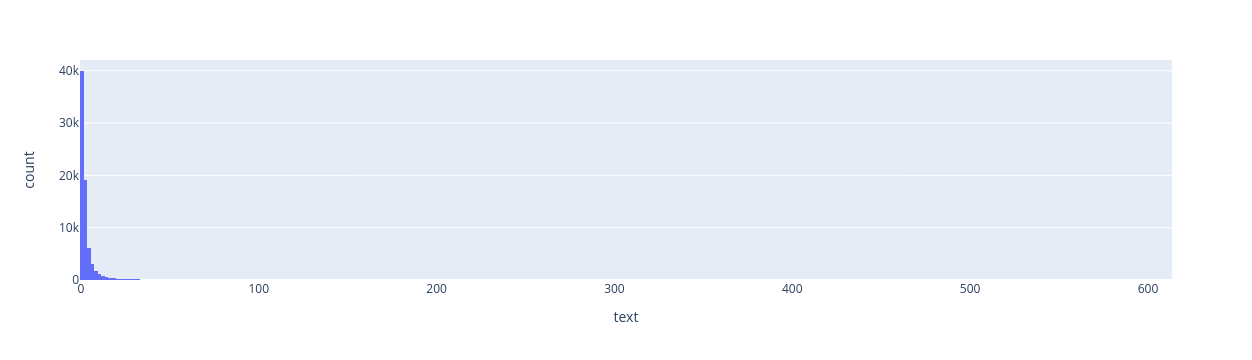

In [38]:
fig = px.histogram(df_total_counts_author, x='text', nbins=500)
fig.show()

In [47]:
client = tweepy.Client(bearer_token = "AAAAAAAAAAAAAAAAAAAAAKKEcwEAAAAA1VgzT5upnu%2B5POQ3dbdUx0%2B5vfA%3DdslAW6ut31gZhQD9SjNKJ4scCFd8bHgbevp8eGcJprbd2LTrGf", wait_on_rate_limit = True)

In [134]:
client.get_user(id ='1517604180')

Response(data=<User id=1517604180 name=J•Σ•∆•M™ username=JEAM_79>, includes={}, errors=[], meta={})